## Deep Learning
Welcome to the MNIST assignment! The hello worldof Deep Leraning. In this task, we will delve into the fascinating world of deep learning and explore the renowned MNIST dataset. This assignment is designed to introduce you to the fundamental concepts of image classification using deep neural networks.

The MNIST dataset is one of the most well-known and extensively used datasets in the field of machine learning and computer vision. It consists of a large collection of grayscale images, each representing a handwritten digit from 0 to 9. These images are 28x28 pixels in size, making them relatively small and manageable for training purposes.

Throughout this assignment, we will be leveraging the power of deep learning to teach our machine learning model how to recognize and distinguish between different handwritten digits. We will guide you through the process of building, training, and evaluating a deep neural network that can accurately predict the correct digit in the test set.

Deep learning has revolutionized the field of artificial intelligence, achieving remarkable success in various applications such as image recognition, natural language processing, and more. The core strength of deep learning lies in its ability to automatically learn hierarchical representations of data, extracting meaningful features as it processes information through layers of interconnected artificial neurons.

Our primary focus will be on Convolutional Neural Networks (CNNs), a class of deep neural networks particularly effective in handling image-related tasks. CNNs have demonstrated exceptional performance in image classification by learning local patterns and spatial hierarchies present in the images.

By the end of this assignment, you will gain valuable insights into the inner workings of deep learning, understand the essential components of building a CNN model, and witness firsthand how these networks can learn to classify handwritten digits accurately.

So, let's embark on this exciting journey into the world of MNIST and deep learning! By the time you complete this assignment, you'll have a solid foundation to explore and tackle more complex challenges in the field of machine learning and artificial intelligence.

### MNIST images
In this assignment, we'll use our existing knowledge of PyTorch and linear regression to solve a different problem: image classification. 
We use the famous MNIST handwritten digit database as reference data. It contains a 28px x 28px grayscale image of the letter number (0-9)
 and a label for each image represented by the number. Here is an example image of the dataset.
 
 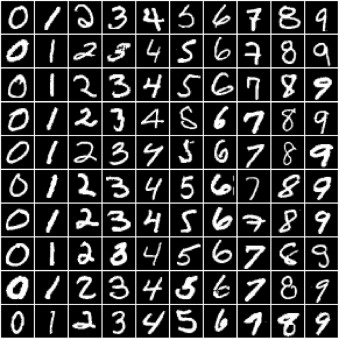 

In [65]:
#Importing 
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np

Downloading the dataset

In [66]:
dataset=MNIST(root='Data/',download=True)

The file is downloaded to the file folder `Data\` of the directory where the jupyter book is located. The next time you run the code, the code will automatically skip it if the file is in the folder.

In [67]:
len(dataset)

60000

The length of datset is `60000`.

The file contains 60000 images. We will use these images to teach the machine to understand the image. So make sure the machine is trained to identify the image. To test the model, we have 10,000 images in the MNIST dataset. These models are at the heart of machine learning and deep learning, and are responsible for learning patterns and representations from input data to make predictions or make decisions.

In [68]:
#to download and save test dataset as test_dataset
test_dataset=MNIST(root='Data/',train=False)

We can create the test dataset using the MNIST class by passing train=False to the constructor.

In [69]:
#length of test_dataset
len(test_dataset)

10000

Let's look at the dataset we have. 

In [70]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

 ```(<PIL.Image.Image image mode=L size=28x28>, 5)```<br>
This is a 28 x 28 pixel pair of images and labels. Images are objects of the PIL.Image.Image class, which is part of the Python Pillow imaging library. You can display graphs in Jupyter using [matplotlib](https://matplotlib.org/), the de facto plotting and graphing library for data science in Python.

In [71]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

The %matplotlib inline statement tells Jupyter that we want to plot the graph in a book. Without this line, Jupyter renders the image. Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself. You can find the full list of magic commands at https://ipython.readthedocs.io/en/stable/interactive/magics.html.

In [72]:
#To display images
image, label=dataset[10]

#plt.imshow(image, cmap='gray')
print('label ',label)
print(image)

label  3
<PIL.Image.Image image mode=L size=28x28 at 0x1C55D387130>


We will now train our model. However, there is a problem with computers that don't understand graphics that only understand numbers. To do this, we need to convert the image data to a tensor. so that the machines understand.

In [73]:
import torchvision.transforms as transforms

So to convert the image to a tensor, import < ``torchvision.transforms``> into < ``transforms``> and convert the PIL(Pillow) to a tensor.

In [74]:
dataset=MNIST(root='Data/',download=True,transform=transforms.ToTensor())

In the above code, a transformer is used to convert the image file to a tensor, now we can see the dimension and label of the converted tensor.<br>In the code above, a transformer is used to convert the image file to a tensor. dataset is a tuple with two elements, the first element is ```image_tensor``` and the second is ```label```

In [75]:
# took random data 
image_tensor,label=dataset[7]
print('The shape of the tensor:',image_tensor.shape,'|label:',label)

The shape of the tensor: torch.Size([1, 28, 28]) |label: 3


The image is now converted to a ``` 1x28x28``` tensor. In the information above, the labels are the actual results from the MNIST images. Here the value is ```3```. The first dimension follows the color channels. The second and third dimensions represent pixels along the ```height``` and ```width``` of the image, respectively. The images in the MNIST dataset are grayscale, so they only have one channel. Other datasets contain images with colors, in this case on three bases: red, green, and blue (RGB).

Lets look athe sample values inside tensor.

In [76]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3569],
        [0.4902, 0.7569, 0.7569, 0.7569, 0.9922],
        [0.9882, 0.9882, 0.9882, 0.9882, 0.9922]])
tensor(1.) tensor(0.)


From the above output, you can understand that the values ​​are between 0 and 1.

### The training and validation dataset

**While building real-world machine learning models, it is quite common to split the dataset into three parts:** 

1. ```Training set``` - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. ```Validation set``` - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. ```Test set``` - used to compare different models or approaches and report the model's final accuracy.

The MNIST dataset contains 60,000 training images and 10,000 test images. There is no pre-validation process, so you have to split the 60,000 images into training and validation data. We collected 10,000 randomly selected images for validation. You can use PyTorch's ```random_spilt``` method to do this.


In [77]:
from torch.utils.data import random_split

The imported ```random_split``` method to split the dataset into training and validation sets.

In [78]:
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)


**Advantages of using a batch loader in training:**
1. ```Memory Efficiency```: Using smaller batches reduces the memory requirements during training, as the neural network doesn't need to load the entire dataset into memory at once.
2. ```Computational Efficiency```: By training on smaller batches, the neural network can take advantage of parallel processing capabilities of modern hardware, leading to faster training times.
3. ```Stochasticity```: Since each batch is randomly selected from the dataset, mini-batch gradient descent introduces some stochasticity to the optimization process, which can help escape local minima and improve convergence.
4. ```Generalization```: Training on different batches allows the neural network to see a diverse range of data points, leading to better generalization on unseen data.
5. ```Regularization```: Mini-batch training acts as a form of regularization, as it introduces noise in the weight updates, which can help prevent overfitting.


<br>We can now create data loaders to help us load the data in batches. We'll use a batch size of 128.

In [79]:
# Impor

from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Suppose you are conducting an experiment. When performing the experiment, correlate the potential difference in the circuit, calculate the current, and plot the relationship between voltage and current. You can change the voltage randomly or from low to high. When changing random voltage, not from low to high. Random gives more accuracy. Here is the method of rolling with this roll. Randomization helps to generalize and speed up the training process. On the other hand, the validation data loader is only used for model evaluation, so there is no need to mix images.

### Model

* As we did with linear regression, we can use nn.Linear to create the model instead of manually creating and initializing the matrices.
* Since nn.Linear expects each training example to be a vector, each ```1x28x28``` image tensor is **flattened** into a vector
 of size ```784 (28*28)``` before being passed into the model.
* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability

In [80]:
import torch.nn as nn
input_size=28*28
num_classes=10

#logistic regression model
model=nn.Linear(input_size,num_classes)

The model is created.Let's take a look at the weights and biases.

In [81]:
#Bias
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0056, -0.0292,  0.0167,  0.0314, -0.0294,  0.0022,  0.0255,  0.0135,
        -0.0205, -0.0161], requires_grad=True)

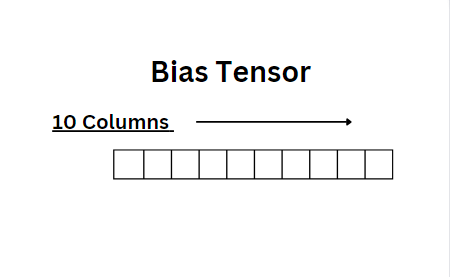

In [82]:
#Weight
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0332, -0.0291,  0.0121,  ...,  0.0230,  0.0245, -0.0250],
        [ 0.0003, -0.0298,  0.0138,  ..., -0.0304,  0.0356, -0.0209],
        [-0.0288, -0.0298,  0.0189,  ...,  0.0043, -0.0231, -0.0197],
        ...,
        [ 0.0223, -0.0165, -0.0240,  ..., -0.0260,  0.0233,  0.0125],
        [-0.0241, -0.0048,  0.0263,  ...,  0.0060, -0.0251,  0.0216],
        [ 0.0155, -0.0014,  0.0025,  ..., -0.0116,  0.0184,  0.0145]],
       requires_grad=True)

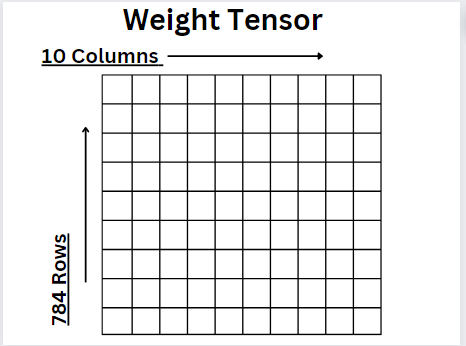

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset and pass them into our model.

In [83]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    #outputs = model(images)
    #print(outputs)
    break

tensor([5, 3, 4, 6, 2, 0, 6, 1, 0, 1, 2, 5, 2, 2, 8, 4, 1, 3, 3, 0, 2, 1, 8, 5,
        9, 7, 3, 6, 2, 3, 6, 8, 5, 9, 9, 0, 5, 3, 0, 3, 8, 5, 6, 2, 2, 2, 5, 1,
        5, 0, 5, 9, 6, 8, 3, 0, 6, 7, 9, 3, 4, 2, 8, 5, 7, 9, 1, 7, 7, 7, 7, 2,
        2, 5, 9, 5, 3, 3, 7, 3, 1, 3, 4, 9, 1, 7, 3, 0, 3, 8, 7, 1, 6, 9, 5, 2,
        9, 4, 9, 5, 1, 8, 6, 9, 6, 8, 4, 5, 4, 2, 4, 6, 9, 8, 6, 0, 4, 7, 9, 1,
        2, 2, 2, 4, 4, 6, 7, 5])
torch.Size([128, 1, 28, 28])


Since we are initializing our input to form 784 and giving [128, 1, 28, 28] as input, this throws an error.<br>
To solve this problem we use another method called ```.reshape ``` .

In [84]:
images.shape
images.reshape(128, 784).shape


torch.Size([128, 784])

The above code generates an error because the input file image is invalid. The size of the image is ```1x28x28```, but it must be a ```784``` vector. That is, it must be flattened. We will use tensor's ```.reshape``` method. This method allows you to effectively "see" each image as a flat vector without making a copy of the underlying data. To include this additional functionality in your model, you must define your custom model by extending the ```nn.Module``` class in PyTorch.

Create a class to extend the nn.Module class from PyTorch to define a custom model.

In [85]:
class MnistModel(nn.Module):  #custom class MnistModel that inherits from nn.Module.
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)    #creating new model with self object
  def forward(self,xb):
    xb=xb.reshape(-1,784)                        #reshaping the tenson and saving to xb
    out=self.linear(xb)                            #taking output from the model
    return out
model = MnistModel()

Inside the __init__ constructor method, we instantiate the weights and biases using nn.Linear. And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.

xb.reshape(-1, 28* 28 ) indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute), but it does have a .parameters method that returns a list containing the weights and bias.

In [86]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [87]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0013, -0.0059,  0.0035,  ..., -0.0157, -0.0170, -0.0271],
         [-0.0044,  0.0178, -0.0131,  ...,  0.0319,  0.0062,  0.0161],
         [-0.0341, -0.0125, -0.0355,  ..., -0.0060,  0.0004,  0.0298],
         ...,
         [-0.0282, -0.0071, -0.0345,  ..., -0.0136,  0.0154, -0.0088],
         [ 0.0326,  0.0041, -0.0265,  ...,  0.0253,  0.0245, -0.0034],
         [-0.0142, -0.0091, -0.0149,  ..., -0.0159,  0.0173, -0.0244]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0354,  0.0351,  0.0146, -0.0010,  0.0252,  0.0133, -0.0310, -0.0086,
          0.0112, -0.0097], requires_grad=True)]

Let's do some demo modeling. In code below image and captions in train_loder (image set is 128). The size of the image is output first, then the model on the next line takes the input and gives the output.

In [88]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:5].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 1.8128e-01, -1.9197e-01,  3.1783e-02,  1.4210e-02, -1.2816e-01,
          2.4974e-01, -1.0616e-01, -2.4623e-01, -3.4657e-02, -2.7850e-02],
        [ 3.1335e-02, -1.0905e-01,  3.0925e-01, -1.3671e-01,  1.3623e-01,
          2.4432e-01,  1.2743e-02, -1.8488e-01, -2.2499e-01, -1.1200e-01],
        [-4.4181e-02, -3.8899e-01,  4.0629e-01,  1.1489e-01, -8.4023e-02,
         -6.9864e-03,  1.4222e-01, -1.8783e-01,  1.5666e-01,  1.4916e-01],
        [ 8.3082e-02,  8.5516e-02,  1.1127e-01, -8.8204e-02,  9.8762e-03,
          3.5496e-02, -1.2524e-01, -4.9877e-01,  2.4974e-04,  1.5353e-01],
        [ 2.2848e-01, -6.4383e-02,  1.7302e-02,  4.4253e-02,  1.1559e-01,
          2.6959e-01, -1.6979e-01, -3.2471e-01, -6.7742e-02,  1.7924e-01]])


We give input to the model and the result is returned as a tensor. We get a tensor tensor as the result. These 10 outcomes represent the expected probability that the number will be between 0 and 9. As mentioned earlier, we want these outputs to represent possibilities. The elements of each output line must be between 0 and 1 and sum to 1, which is not the case.

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

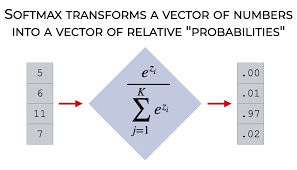

Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

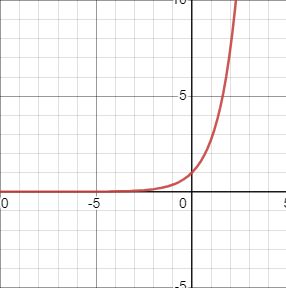

Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [89]:
import torch.nn.functional as F

The softmax function is included in the ```torch.nn.functional``` package and requires us to specify a dimension along which the function should be applied.

The ```nn.functional``` is applied below

In [90]:
#applying Softmax
prob=F.softmax(outputs,dim=1)
print('sample probability \n',prob[:2].data)
print("Sum:",torch.sum(prob[1]).item())

sample probability 
 tensor([[0.1217, 0.0838, 0.1048, 0.1029, 0.0893, 0.1303, 0.0913, 0.0793, 0.0980,
         0.0987],
        [0.1019, 0.0886, 0.1346, 0.0862, 0.1132, 0.1261, 0.1001, 0.0821, 0.0789,
         0.0883]])
Sum: 1.0


After softmax conversion, we can see that the sum corresponds to a maximum of 1. Here the sum of T is found using pytorch's built-in function ```torch.sum```. This function returns sum and grad_fn. Since we don't need grad_fn , let's add ```item()``` to ```torch.sum```. This will only return 1.

In [91]:
max_probs, preds = torch.max(prob, dim=1)
print(preds)
print(max_probs)

tensor([5, 2, 2, 9, 5, 9, 3, 5, 5, 2, 5, 5, 5, 5, 5, 3, 2, 2, 0, 2, 5, 3, 3, 0,
        5, 3, 3, 5, 0, 5, 9, 3, 3, 5, 3, 3, 5, 5, 3, 2, 0, 0, 0, 5, 0, 3, 0, 0,
        2, 3, 1, 6, 3, 2, 0, 0, 3, 5, 0, 0, 3, 3, 0, 0, 2, 5, 3, 2, 5, 3, 5, 0,
        5, 2, 0, 5, 5, 0, 3, 5, 5, 9, 5, 3, 5, 5, 3, 3, 3, 5, 3, 3, 3, 3, 5, 2,
        5, 5, 5, 0, 3, 0, 2, 3, 2, 0, 2, 3, 5, 5, 2, 5, 2, 0, 3, 9, 5, 0, 5, 0,
        5, 9, 0, 2, 3, 2, 0, 0])
tensor([0.1303, 0.1346, 0.1432, 0.1176, 0.1261, 0.1333, 0.1450, 0.1643, 0.1287,
        0.1359, 0.1348, 0.1635, 0.1439, 0.1364, 0.1224, 0.1226, 0.1560, 0.1312,
        0.1270, 0.1296, 0.1208, 0.1254, 0.1511, 0.1352, 0.1619, 0.1400, 0.1669,
        0.1330, 0.1444, 0.1283, 0.1387, 0.1334, 0.1611, 0.1385, 0.1584, 0.1563,
        0.1348, 0.1408, 0.1217, 0.1462, 0.1353, 0.1242, 0.1297, 0.1364, 0.1292,
        0.1343, 0.1472, 0.1411, 0.1670, 0.1404, 0.1086, 0.1194, 0.1446, 0.1474,
        0.1293, 0.1470, 0.1251, 0.1564, 0.1382, 0.1514, 0.1495, 0.1421, 0.1543,
       

Finally, we can determine the predicted label for each image simply by selecting the element index with the highest probability in each output row. We can do this using       ```Torch.max``` , which returns the largest element of each row and its index.

### Evaluation Metric and Loss Function

In [92]:
torch.sum(preds==labels)

tensor(18)

The ```==``` operator performs a comparison between two same-body tensors and returns the same-body tensor. This tensor is True for unequal terms and False for equal terms. Passing the result to torch.sum returns the sum of the predicted values. Finally, divide by all the numbers to get the truth.
Since the results are of similar order, there is no need to apply softmax to the output. Indeed, ```e^x``` is an increasing function. That is, if ```y1 > y2```, then ```e^y1 > e^y2```. Even after averaging the values ​​to get the softmax. Let's calculate the accuracy of the current model on the first set of data.

In [93]:
def accuracy(output, label):
  _, preds=torch.max(output,dim=1)
  return torch.tensor(torch.sum(preds==label).item()/len(preds))

In [94]:
accuracy(outputs,labels)

tensor(0.1406)

Accuracy is a great way for us (humans) to evaluate a model. However, we cannot use it as a loss function to optimize our model using gradient descent for the following reasons:

1. It is not a differentiable function. Both `torch.max` and `==` are non-continuous and non-differentiable operations, so the precision to compute the gradients of the weights and biases is not available. 
2. It does not take into account the actual potential predicted by the model, so it may not provide adequate feedback for incremental improvements.

For these reasons, accuracy is often used as an evaluation measure for classification, but not as a loss function. A common loss function for classification problems is the mutual entropy, which has the following formula.

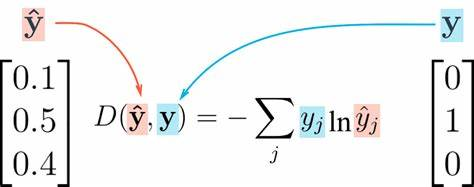

It sounds difficult, but it is very easy.

* Select the prediction result for the correct label for each output line. For example, if the estimated probability for an image is ```[0.1, 0.3, 0.2, ...]``` and the label is ```1```, it will select the item ```0.3``` and ignore the rest. 
* Then take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of what will be selected. If the result is high, for example close to 1, then its logarithm is a very low value, close to 0. When the probability is low (close to 0), the logarithm is a very negative value. Moreover, multiplying the probability by -1 gives a positive result in terms of losing the prediction error. 

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, we calculate the average of the cross-entropy over all output lines to get the total loss for a data set.

Unlike true, cross-entropy is a constant and variable function. It also provides useful information on further model development (less loss with slightly higher probability of correct labeling). These two factors make cross-entropy a better choice for unemployment.

 As you would expect, PyTorch provides a functional and optimized cross-entropy function as part of the ```torch.nn.functional``` package. It also does softmax internally, so you can pass the model output directly without converting it to a result.

In [95]:
#defining cross entropy
loss_fn=f.cross_entropy

NameError: name 'f' is not defined

The most important part of the ```f.cross_entropy``` function is that it internally Softmaxes to hide the probability value. Then, find the index that has the highest probability value as well. So you don't have to go through the whole process and enter the result.

In [ ]:
loss=loss_fn(outputs,labels)
print(loss.item())

2.3346264362335205


We know that cross-entropy is the negative logarithm of the expected probability of a label averaged over all training samples. So that's one way to interpret the results. ```2.23``` is ```e^-2.23```, which is approximately ```0.1``` because the estimated probability of the label is medium. The lower the loss, the better the model.

### Training the model

Now that we have defined the data loader, model, loss function, and optimization, we are ready to train the model. The training process is similar to linear regression, with the addition of a "validation phase" to evaluate the model in each time slice. This is what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

We'll include the problem-independent parts within a function called ```fit```, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the ```nn.Module``` class.

In [ ]:
def fit(epochs, lr, model,train_loader, val_loader, opt_function=torch.optim.SGD):
  optimizer=opt_function(model.parameters(),lr)
  history=[]
   
   #Training phase
  for epoch in range(epochs):
    for batch in train_loader:

                #Create another function training_steps to train the model and return loss
      loss=model.training_step(batch)
                #Differentiate the loss 
      loss.backward()
                #Optimise the weight and bias 
      optimizer.step()
                #Set the optimiser grad to zero
      optimizer.zero_grad()


    #Validation Phase
                #Create a function to evaluate the model by validation dastaset
    result=evaluate(model,val_loader)
                #Create a function to print the result for each epoch
    model.epoch_end(epoch,result)
                #Append result for each epoch to analyse the learning
    history.append(result)


  return history

The ```fit``` function captures the credit loss and metric for each period. Returns a history of the formation, useful for debugging and visualizing. Configurations such as batch size, learning rate, etc. (called hyperparameters) must be pre-selected when training machine learning models. Choosing the right hyperparameters is critical to training a reasonably accurate model in a reasonable amount of time. It is an active area for research and machine learning. Feel free to try different learning rates and see how they affect the training process

Let's define the ```evaluate``` function, used in the validation phase of ```fit```.

In [ ]:
#function to evaluate the model with validating datset.
def evaluate(model,val_loader):
                  #validation_step is another function made to do f.cross_entopy test on validation dataset. 
  output=[model.validation_step(batch) for batch in val_loader]
                  #validation_epoch_end is a function created to take validation and calculate mean loss in each epoch  
  return model.validation_epoch_end(output)

Finally, let's redefine the ```MnistModel``` class to include additional methods ```training_step```, ```validation_step```, ```validation_epoch_end``` and ```epoch_end``` used by ```fit``` and ```evaluate```.

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):            
        xb = xb.reshape(-1, 784)         #reshape xb
        out = self.linear(xb)                 
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):  ###
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

[Learn more about classes and objects in Python.](https://www.w3schools.com/python/python_classes.asp)

**Let me explain the different parts of your model:**

**Initialization ( ```__init__``` ):**<br>
In the constructor ```__init__```, you define the structure of your neural network. The model has one layer, which is a linear (fully connected) layer called ```self.linear```. The input size of this layer is specified by ```input_size```, and the output size is specified by ```num_classes```.

**Forward Pass ( ```forward``` ):**<br>
In the ```forward``` method, you define how the data flows through the neural network during the forward pass. Here, you ```reshape``` the input ```xb``` (usually a batch of images) to a ```2D``` tensor with the first dimension being the batch size and the second dimension being the flattened image data. Then, you pass this flattened data through the linear layer self.linear to get the output predictions out.

**Training Step ( ```training_step``` ):**<br>
The ```training_step``` method defines what happens during each training step for a single batch of data. It takes the batch of images (```images```) and their corresponding labels (```labels```) as input, generates predictions using the ```forward``` method, calculates the cross-entropy loss between the predictions and the true labels, and returns the loss.

**Validation Step ( ```validation_step``` ):**<br>
The validation_step method is similar to the training_step, but it is used for validation data. It takes a batch of validation images (images) and their corresponding labels (labels) as input, generates predictions using the forward method, calculates the cross-entropy loss, and also calculates the accuracy of the model predictions.

**Validation Epoch End ( ```validation_epoch_end``` ):**<br>
The ```validation_epoch_end``` method is called at the end of each validation epoch. It takes a list of outputs (each output being the dictionary returned by ```validation_step```) and calculates the average validation loss and accuracy across all batches in the validation set.

**Epoch End ( ```epoch_end``` ):**<br>
The ```epoch_end``` method is called after each epoch during training and printing the validation loss and accuracy.

You have created an instance of this model called model, which is now ready to be trained on the MNIST dataset or evaluated on new data.

Lets check the functions.

In [ ]:
hist0=evaluate(model,val_loader)

In [ ]:
hist1=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9524, val_acc: 0.6144
Epoch [1], val_loss: 1.6808, val_acc: 0.7153
Epoch [2], val_loss: 1.4790, val_acc: 0.7503
Epoch [3], val_loss: 1.3273, val_acc: 0.7764
Epoch [4], val_loss: 1.2109, val_acc: 0.7908


In [ ]:
hist2=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1196, val_acc: 0.8029
Epoch [1], val_loss: 1.0464, val_acc: 0.8116
Epoch [2], val_loss: 0.9865, val_acc: 0.8169
Epoch [3], val_loss: 0.9367, val_acc: 0.8223
Epoch [4], val_loss: 0.8945, val_acc: 0.8261


In [ ]:
hist3=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8585, val_acc: 0.8281
Epoch [1], val_loss: 0.8272, val_acc: 0.8316
Epoch [2], val_loss: 0.7998, val_acc: 0.8343
Epoch [3], val_loss: 0.7756, val_acc: 0.8375
Epoch [4], val_loss: 0.7541, val_acc: 0.8414


In [ ]:
h = [hist0]+hist1+hist2+hist3

In [ ]:
import seaborn as sns

In [64]:
accuracies = [result['val_acc'] for result in h]
matplotlib.use('agg')
plt.plot(accuracies, '-x')

NameError: name 'h' is not defined